In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [4]:
dataset = pd.read_csv("housing_data.csv")
print(dataset.keys()) 

Index(['lot_area', 'firstfloor_sqft', 'living_area', 'bath', 'garage_area',
       'price'],
      dtype='object')


In [5]:
seattle = pd.DataFrame(dataset, columns=dataset.columns)
seattle.head(5)

,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
0,8450,856,1710,2,548,208500
1,9600,1262,1262,2,460,181500
2,11250,920,1786,2,608,223500
3,9550,961,1717,1,642,140000
4,14260,1145,2198,2,836,250000


(6.05, -0.05)

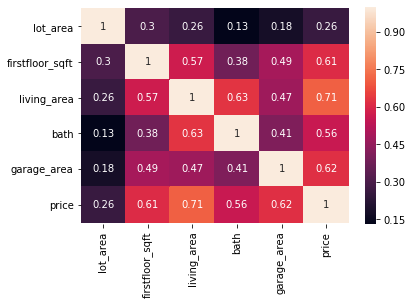

In [14]:
correlation_matrix = seattle.corr().round(2)
# annot = True to print the values inside the square
ax = sns.heatmap(correlation_matrix, annot=True)
ax.set_ylim(len(correlation_matrix)+0.05, -0.05)

In [15]:
seattle.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
lot_area,1.0,0.3,0.26,0.13,0.18,0.26
firstfloor_sqft,0.3,1.0,0.57,0.38,0.49,0.61
living_area,0.26,0.57,1.0,0.63,0.47,0.71
bath,0.13,0.38,0.63,1.0,0.41,0.56
garage_area,0.18,0.49,0.47,0.41,1.0,0.62
price,0.26,0.61,0.71,0.56,0.62,1.0


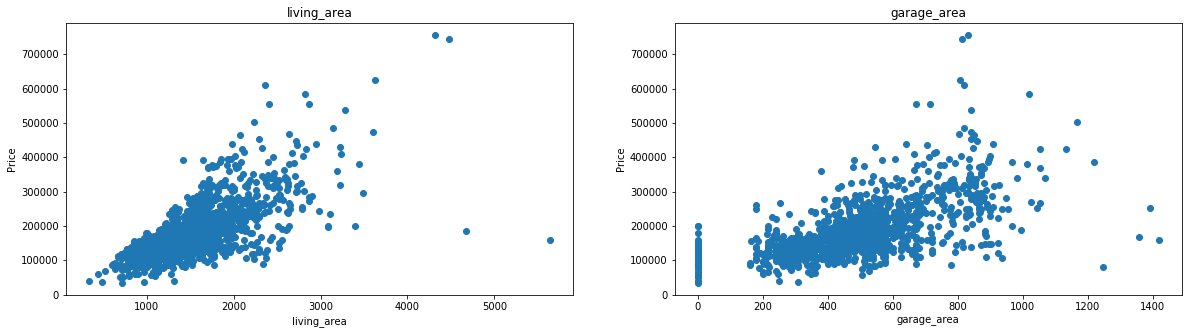

In [19]:
plt.figure(figsize=(20, 5))

features = ['living_area', 'garage_area']
target = seattle['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = seattle[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [20]:
X = pd.DataFrame(np.c_[seattle['living_area'], seattle['garage_area']], columns = ['living_area', 'garage_area'])
Y = seattle['price']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1168, 2)
(292, 2)
(1168,)
(292,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 50697.123862674205
R2 score is 0.5894287808988332


The model performance for testing set
--------------------------------------
RMSE is 45086.7942149342
R2 score is 0.6867770499591397
